We will be creating a **classifcation model to predict if a company goes bankrupt or not**. 

The data collected is from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report

In [4]:
df = pd.read_csv('data.csv')
df.shape

(6819, 96)

In [3]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [5]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_columns)

# Optionally, show the percentage of missing values
missing_percentage = (missing_columns / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)

Columns with missing values:
Series([], dtype: int64)

Percentage of missing values in each column:
Series([], dtype: float64)


In [6]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 96)


We can see that the target variable is the 'Bankrupt?' column. There are **no missing values and no duplicate values**. There are 96 columns in the dataset.... which is a lot so we will do further exploration to see which columns are not so useful in predicting the target variable so we can drop them.

In [9]:
is_all_numeric = not df.isnull().values.any()
print(is_all_numeric)

True


In [11]:
print(df.columns.tolist())

['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth 

pd.set_option('display.max_columns', None)

In [4]:
df['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

We will be using **stratified train-test split** as the target variable is highly imbalanced. This works by dividing the dataset into subgroups based on the target variable (bankruptcy status), ensuring that each subgroup is represented proportionally in both training and testing sets. This prevents the model from being biased towards the majority class and improves its ability to accurately predict bankruptcies.

In [26]:
def split_data(df, target_column='Bankrupt?'):
  """
  Prepares the data for modeling by splitting into features and target variable, 
  and then performing a stratified split for training and testing sets.

  Args:
    df: The pandas DataFrame containing the data.
    target_column: The name of the target column.

  Returns:
    X_train: The training features.
    X_test: The testing features.
    y_train: The training target variable.
    y_test: The testing target variable.
  """

  X = df.drop(target_column, axis=1)  # Features
  y = df[target_column]  # Target variable

  # Stratified split
  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)
  print(y_train.value_counts(normalize=True))
  print(y_test.value_counts(normalize=True))

  return X_train, X_test, y_train, y_test

For the evaluation metrics, we will be using 
1. **Precision**: It explains how many of the correctly predicted cases actually turned out to be positive. 
2. **Recall**:  It explains how many of the actual positive cases we were able to predict correctly with our model.
3. **F1-score**: A single metric that combines precision and recall using the harmonic mean. It's a balance between being cautious (precision) and being thorough (recall). F1-score is preferable to accuracy for class-imbalanced datasets
Utimately, the F1-score will decide which model is better. We will be inspecting the precision and recall to get a better understanding of the results.

As for the models, we will be using
1. **Logistic Regression**: A simple and interpretable model that can be used as a baseline.
2. **Decision Tree**: A versatile model capable of capturing complex, non-linear relationships.
3. **Random Forest**: A powerful ensemble method that combines multiple decision trees to improve accuracy and reduce overfitting.

#### Logistic Regression

In [27]:
X_train, X_test, y_train, y_test = split_data(df)

Bankrupt?
0    0.967736
1    0.032264
Name: proportion, dtype: float64
Bankrupt?
0    0.967742
1    0.032258
Name: proportion, dtype: float64


In [28]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

# regularization constant (strength)
REG_CONST = 0.01

# Create a model and fit it to the training data.
# C := inverse of regularization strength
model = LogisticRegression(penalty='l2', C=1./REG_CONST, max_iter=300)
model.fit(x_train_scaled, y_train)

# Predict the classes of test data 
y_pred = model.predict(x_test_scaled)

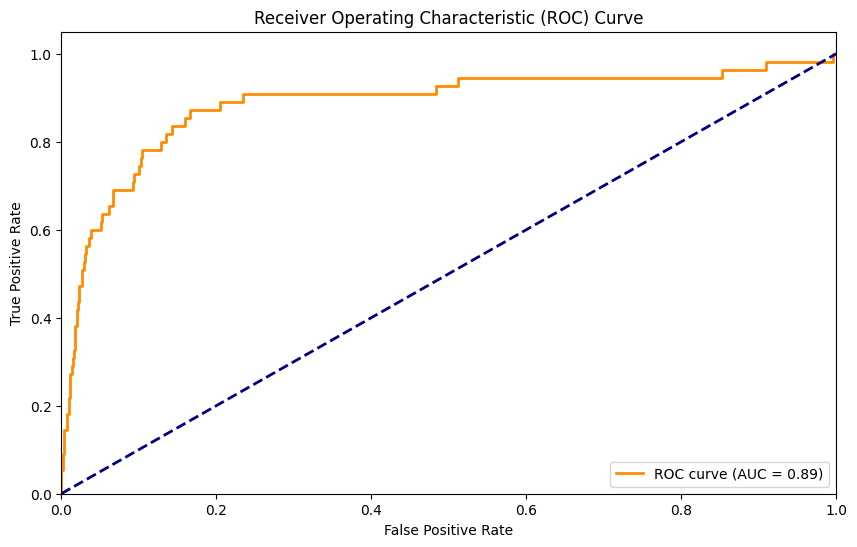

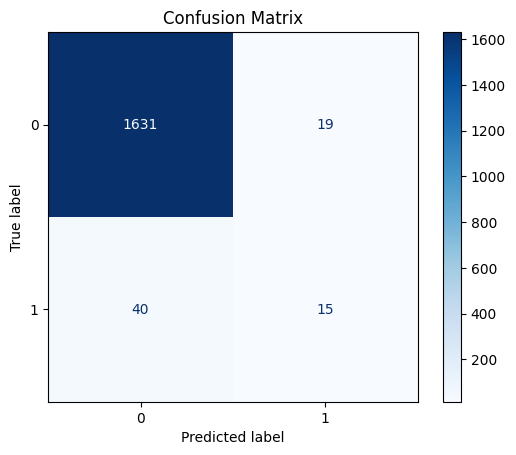

AUC Score: 0.887
F1 Score: 0.337

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1650
           1       0.44      0.27      0.34        55

    accuracy                           0.97      1705
   macro avg       0.71      0.63      0.66      1705
weighted avg       0.96      0.97      0.96      1705



In [29]:
# Get prediction probabilities
y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print AUC score
print(f'AUC Score: {roc_auc:.3f}')
print(f'F1 Score: {f1:.3f}')

# Print Classification Report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

The model performs exceptionally well in predicting non-bankrupt companies (class 0), with high precision, recall, and F1-score. However, it struggles to accurately identify bankrupt companies (class 1), as indicated by the lower precision, recall, and F1-score for this class.

#### Decision Tree

In [30]:
X_train, X_test, y_train, y_test = split_data(df)

Bankrupt?
0    0.967736
1    0.032264
Name: proportion, dtype: float64
Bankrupt?
0    0.967742
1    0.032258
Name: proportion, dtype: float64


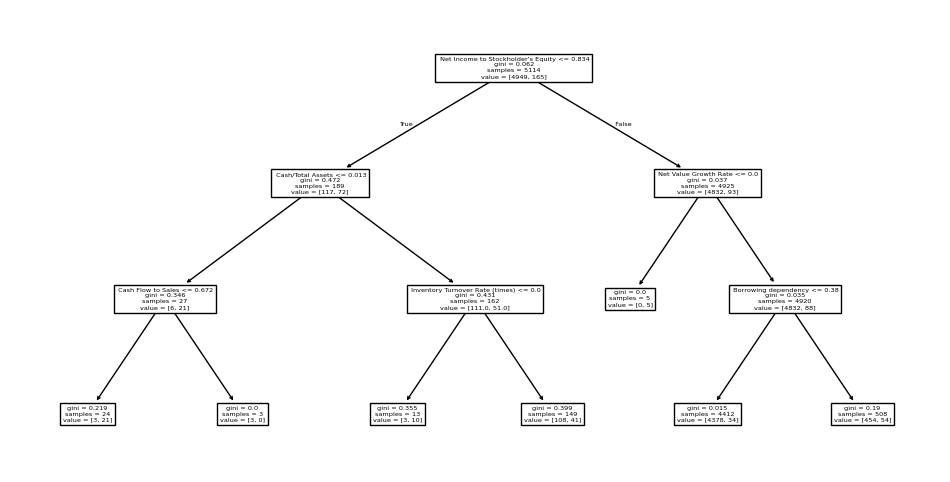

F1-Score:
0.125

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1650
           1       0.44      0.07      0.12        55

    accuracy                           0.97      1705
   macro avg       0.71      0.53      0.55      1705
weighted avg       0.95      0.97      0.96      1705



In [31]:
sk_model = DecisionTreeClassifier(max_depth=3, random_state=1)
sk_model.fit(X_train, y_train)
sk_pred = sk_model.predict(X_test)

# Plotting 
feature_names = X_train.columns.tolist()
plt.figure(figsize=(12, 6))
tree.plot_tree(sk_model, feature_names=feature_names)
plt.show()

# Calculate F1 score
print("F1-Score:")
print(f1_score(y_test, sk_pred))

# Print Classification Report 
print("\nClassification Report:")
print(classification_report(y_test, sk_pred))

In [32]:
X = df.drop('Bankrupt?', axis=1)  # Features
y = df['Bankrupt?']  # Target variable

# Split the data into training, validation and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_test, X_eval, y_test, y_eval = train_test_split(X_test, y_test, test_size = 0.5)


Depth = 1, train_acc = 0.9665, eval_acc = 0.9746
Depth = 2, train_acc = 0.9702, eval_acc = 0.9726
Depth = 3, train_acc = 0.9734, eval_acc = 0.9726
Depth = 4, train_acc = 0.9753, eval_acc = 0.9658
Depth = 5, train_acc = 0.9807, eval_acc = 0.9668
Depth = 6, train_acc = 0.9847, eval_acc = 0.9668
Depth = 7, train_acc = 0.9885, eval_acc = 0.9638
Depth = 8, train_acc = 0.9910, eval_acc = 0.9658


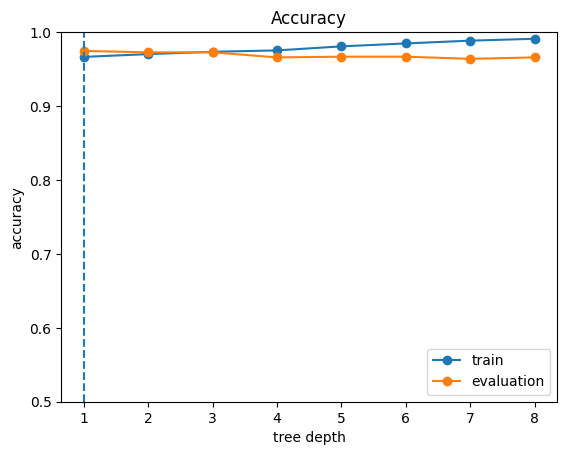

In [6]:

# Create decision tree models of various depths, 
# and measure the accuracy of validation data for each model.
train_acc = []
eval_acc = []
max_depth = 8
for d in range(1, max_depth+1):
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(X_train, y_train)
    
    # Measure the accuracy of this model using the training data.
    y_pred = model.predict(X_train)
    train_acc.append((y_pred == y_train).mean())

    # Measure the accuracy of this model using the validation data.
    y_pred = model.predict(X_eval)
    eval_acc.append((y_pred == y_eval).mean())
    print('Depth = {}, train_acc = {:.4f}, eval_acc = {:.4f}'\
          .format(d, train_acc[-1], eval_acc[-1]))

# Find the optimal depth with the highest accuracy of validation data.
opt_depth = np.argmax(eval_acc) + 1

# Visualize accuracy changes as depth changes.
plt.plot(train_acc, marker='o', label='train')
plt.plot(eval_acc, marker='o', label='evaluation')
plt.legend()
plt.title('Accuracy')
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(max_depth), np.arange(1, max_depth+1))
plt.axvline(x=opt_depth-1, ls='--')
plt.ylim(0.5, 1.0)
plt.show()

Optimal depth = 1, test_acc = 0.9717


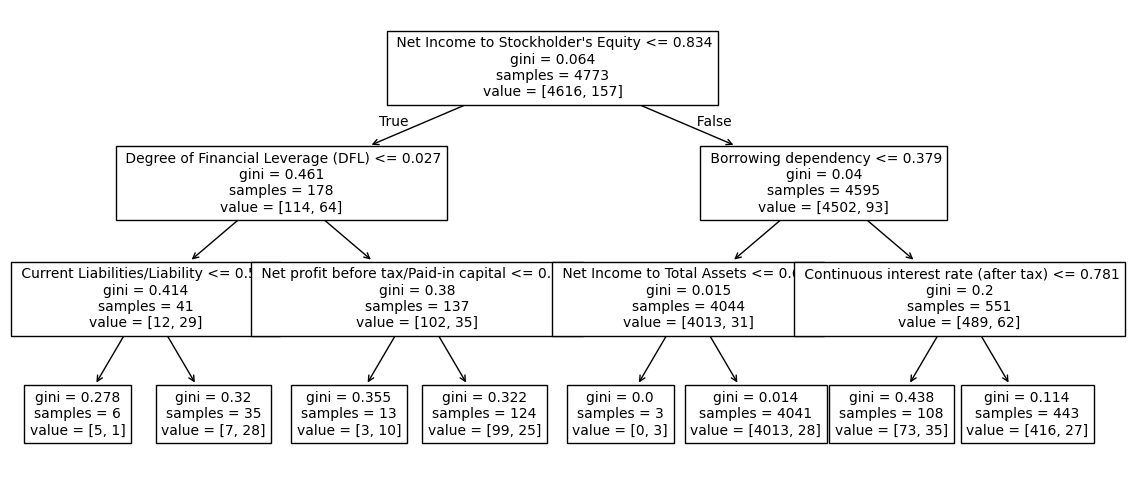

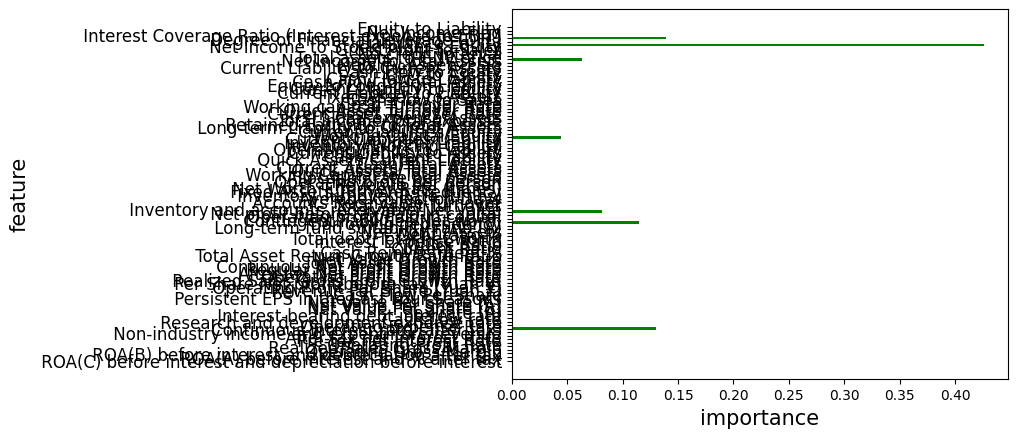

feature importance = [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.13  0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.115 0.    0.    0.082 0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.044 0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.064 0.    0.    0.    0.426 0.    0.139 0.    0.    0.   ]


In [28]:
# I set max_step=3 as a constant value for tree visualization.
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

# Use test data to evaluate final performance.
y_pred = model.predict(X_test)
test_acc = (y_pred == y_test).mean()
print('Optimal depth = {}, test_acc = {:.4f}'.format(opt_depth, test_acc))
        
# Visualize the tree
# plt.figure(figsize=(20,10))
feat_names = X.columns.tolist()
plt.figure(figsize=(14,6))
tree.plot_tree(model, feature_names = feat_names, fontsize=10)
plt.show()

# Analyze the importance of features.
feature_importance = model.feature_importances_
n_feature = X_train.shape[1]
idx = np.arange(n_feature)

plt.barh(idx, feature_importance, align='center', color='green')
plt.yticks(idx, feat_names, size=12)
plt.xlabel('importance', size=15)
plt.ylabel('feature', size=15)
plt.show()

print('feature importance = {}'.format(feature_importance.round(3)))

#### Random Forest

In [33]:
X_train, X_test, y_train, y_test = split_data(df)

Bankrupt?
0    0.967736
1    0.032264
Name: proportion, dtype: float64
Bankrupt?
0    0.967742
1    0.032258
Name: proportion, dtype: float64


In [34]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model   
print("F1-Score:")
print(f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

F1-Score:
0.35294117647058826
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1650
           1       0.92      0.22      0.35        55

    accuracy                           0.97      1705
   macro avg       0.95      0.61      0.67      1705
weighted avg       0.97      0.97      0.97      1705



### In Conclusion

When I searched for a good F1-Score, it said that ypically, an F1 score > 0.9 is considered excellent. A score between 0.8 and 0.9 is considered good, while a score between 0.5 to 0.8 is considered average. If the F1 score falls below 0.5, then the model is considered to have a poor performance.
In conclusion, all the models have poor performance as they are all below 0.5 ...